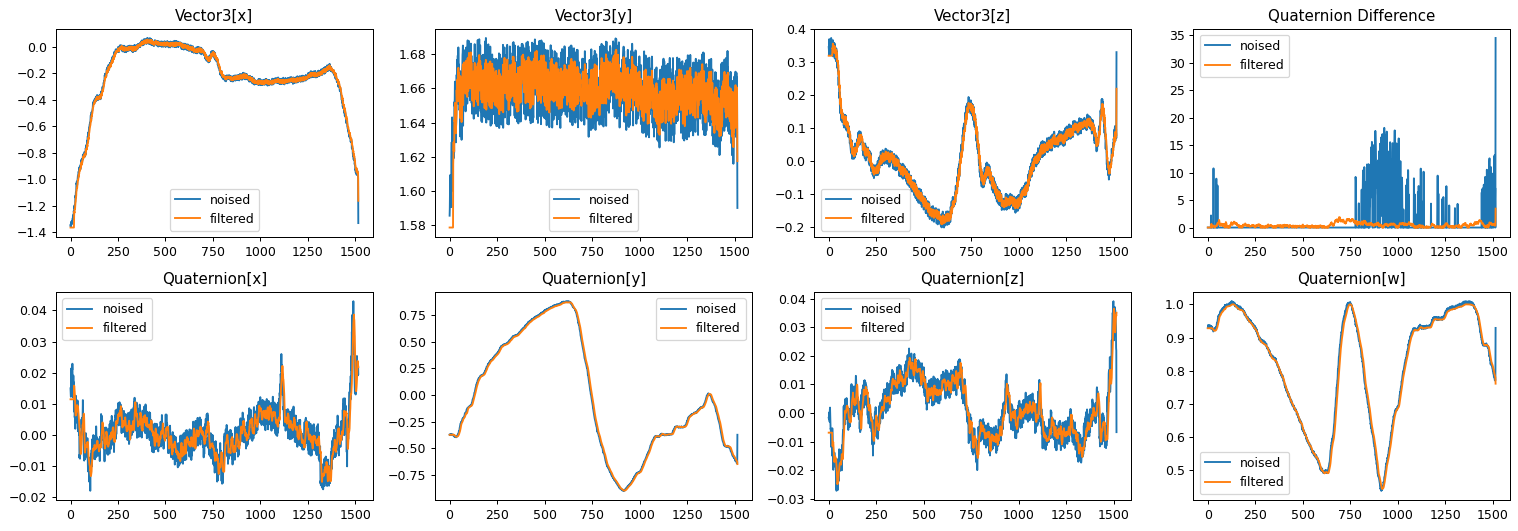

In [23]:
#@title Make 8 plots
 
Mode = "nois+filt" #@param ["orig", "nois", "filt", "nois+filt"]
titles = ['Vector3[x]', 'Vector3[y]', 'Vector3[z]', 'Quaternion Difference', 'Quaternion[x]', 'Quaternion[y]', 'Quaternion[z]', 'Quaternion[w]']
names = ['PosX', 'PosY', 'PosZ', 'RotA', 'RotX', 'RotY', 'RotZ', 'RotW']

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import pandas as pd
import numpy as np
figure(figsize=(17, 6), dpi=90)

def plot_sub_one(index, title, data, label):
  indices = range(data.shape[0])
  plt.subplot(2, 4, index)
  plt.title(title)
  plt.plot(indices, data, label=label)
  plt.legend()

def plot_one(data, label):
  for i in range(1, 9):
    plot_sub_one(i, titles[i - 1], data[names[i - 1]], label)

def plot_sub_two(index, title, datas, labels):
  plt.subplot(2, 4, index)
  plt.title(title)
  for i in range(len(datas)):
    indices = range(datas[i].shape[0])
    plt.plot(indices, datas[i], label=labels[i])
  plt.legend()

def plot_two(datas, labels):
  for i in range(1, 9):
    currDatas = [datas[j][names[i - 1]] for j in range(len(datas))]
    plot_sub_two(i, titles[i - 1], currDatas, labels)

data = {}
if Mode == "orig":
  plot_one(pd.read_csv('2stationsFull.csv'), 'ideal')
elif Mode == "nois":
  plot_one(pd.read_csv('noisedFull.csv'), 'noised')
elif Mode == "filt":
  plot_one(pd.read_csv('filteredFull.csv'), 'filtered')
elif Mode == "nois+filt":
  plot_two([pd.read_csv('noisedFull.csv'), pd.read_csv('filteredFull.csv')], ['noised', 'filtered'])
  
 
plt.tight_layout()
plt.show()